In [1]:
import pandas as pd
df = pd.read_csv("../data/西瓜数据集.csv", index_col=0)
df

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
编号,,,,,,,,,
1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否


In [2]:
df['色泽']=df['色泽'].map({'浅白':1,'青绿':2,'乌黑':3})
df['根蒂']=df['根蒂'].map({'稍蜷':1,'蜷缩':2,'硬挺':3})
df['敲声']=df['敲声'].map({'清脆':1,'浊响':2,'沉闷':3})
df['纹理']=df['纹理'].map({'清晰':1,'稍糊':2,'模糊':3})
df['脐部']=df['脐部'].map({'平坦':1,'稍凹':2,'凹陷':3})
import numpy as np
df['触感'] = np.where(df['触感']=="硬滑",1,2)
df['好瓜'] = np.where(df['好瓜']=="是",1,0)
df

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
编号,,,,,,,,,
1,2,2,2,1,3,1,0.697,0.460,1
2,3,2,3,1,3,1,0.774,0.376,1
3,3,2,2,1,3,1,0.634,0.264,1
4,2,2,3,1,3,1,0.608,0.318,1
5,1,2,2,1,3,1,0.556,0.215,1
6,2,1,2,1,2,2,0.403,0.237,1
7,3,1,2,2,2,2,0.481,0.149,1
8,3,1,2,1,2,1,0.437,0.211,1
9,3,1,3,2,2,1,0.666,0.091,0


In [3]:
Xtrain = df.iloc[:,:-1]
Xtrain = np.array(Xtrain)
Ytrain = df.iloc[:,-1]

In [4]:
!pip install graphviz

In [5]:
# 调用sklearn内置的决策树的库和画图工具
from sklearn import tree
import graphviz
# 利用信息熵构建决策树模型
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain,Ytrain)

In [6]:
# 绘制决策树的图形
feature_names = ["色泽","根蒂","敲声","纹理","脐部","触感","密度","含糖率"]
dot_data = tree.export_graphviz(clf,
                                feature_names=feature_names,
                                class_names=["坏瓜", "好瓜"],
                                filled=True,
                                rounded=True
                                )
graph = graphviz.Source(dot_data)
# graph

In [7]:
!pip install sklearn.tree

Could not fetch URL https://pypi.org/simple/sklearn-tree/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/sklearn-tree/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1125)'))) - skipping
ERROR: Could not find a version that satisfies the requirement sklearn.tree
ERROR: No matching distribution found for sklearn.tree


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21547 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31958 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib

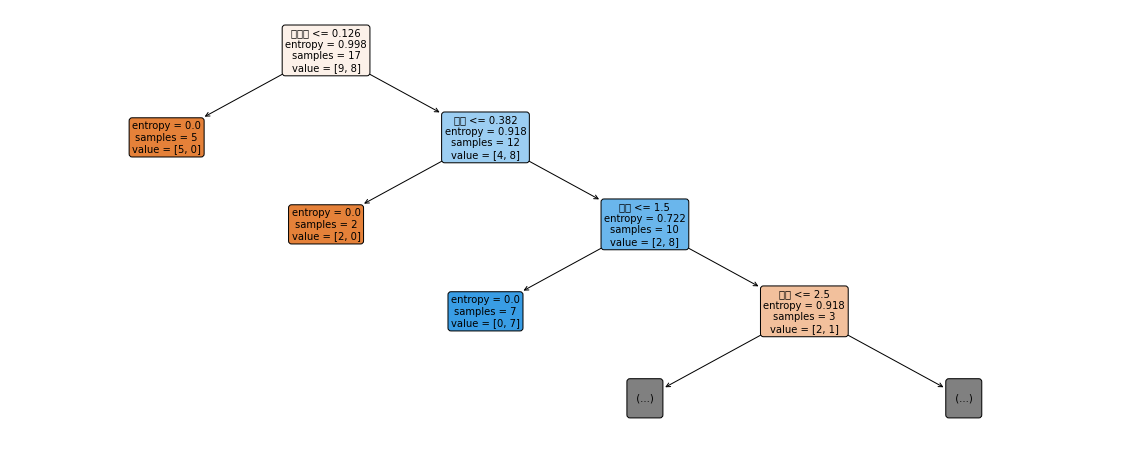

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (20,8))
feature_names = ["色泽","根蒂","敲声","纹理","脐部","触感","密度","含糖率"]
plot_tree(clf, max_depth=3, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
plt.show()